In [ ]:
# A quick look at the artists of the Tate collection
# Questions to answer: 
# 1. How are well male and female artists represented in the collection?
# 2. How international is the collection?
# How have both of these things changed over time?

In [1]:
import requests, json, csv
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)


In [56]:
# Read in artists dataframe containing information on all the artists in the Tate collection. I have done a small
# amount of preprocessing in a separate script using the Google Maps API to geocode the places of birth into coords

artists_df = pd.read_csv('artists_full.csv')

# We've got about 3 and a half thousand different artists here. Lots to work with!
print(artists_df.shape)

# We can drop the unnamed index column at the start
# artists_df.drop(columns = {'0'}, inplace=True)

# Let's have a quick look at the data.
artists_df.head()
# artists_df.dtypes

(3532, 14)


,Unnamed: 0,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,all,BirthCoords,BirthLat,BirthLon
0,0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,NaN,"(51.919438, 19.145136)",51.919438,19.145136
1,1,9243,"Cadere, André",Male,1934–1978,1934.0,1978.0,Polska,France,http://www.tate.org.uk/art/artists/andre-cader...,NaN,"(51.919438, 19.145136)",51.919438,19.145136
2,2,1385,"De Karlowska, Stanislawa",Female,1876–1952,1876.0,1952.0,Polska,"London, United Kingdom",http://www.tate.org.uk/art/artists/stanislawa-...,NaN,"(51.919438, 19.145136)",51.919438,19.145136
3,3,1091,"Fijalkowski, Stanislaw",Male,born 1922,1922.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/stanislaw-f...,NaN,"(51.919438, 19.145136)",51.919438,19.145136
4,4,10038,"Mir, Aleksandra",Female,born 1967,1967.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/aleksandra-...,NaN,"(51.919438, 19.145136)",51.919438,19.145136


Number of male artists: 2895
Number of female artists: 521


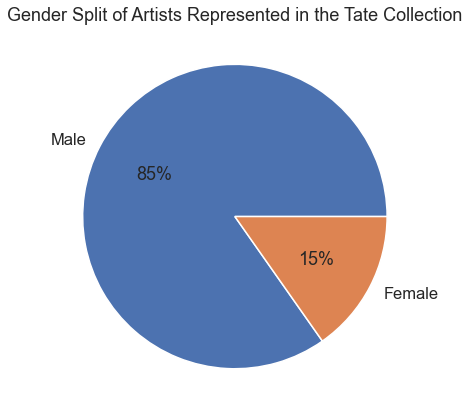

In [37]:
# A first interesting question to ask might be to do with the genders of Tate collection artists.
# Firstly, what's the male/female split?
n_males = len(artists_df[artists_df.gender == 'Male'])
n_females = len(artists_df[artists_df.gender == 'Female'])
print('Number of male artists: ' + str(n_males))
print('Number of female artists: ' + str(n_females))

# The collection is overwhelmingly made up of works by male artists. What does that look like as a pie chart?
sns.set_context('notebook')
fig, ax = plt.subplots(figsize=(12, 7))
ax.pie([n_males, n_females], labels = ['Male', 'Female'], autopct='%.0f%%')
ax.set_title('Gender Split of Artists Represented in the Tate Collection')
plt.show()

# And we see here that the collection is 85% male. However I suspect that gender representation with art has come
# a little way since the founding of the Tate collection is 1897. How has this gender split changed over time?

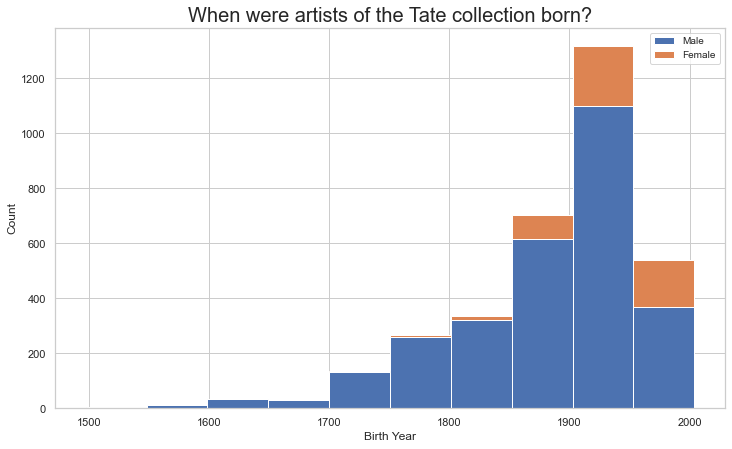

In [47]:
sns.set_theme(style="whitegrid")

# Now we want to show the distribution of the years in which people were born, for both male and female. It would be
# nice to also be able to explore when the Tate acquired these works, but that year isn't in this dataset.

# Create figure and axes
f, ax = plt.subplots(figsize = (12, 7))

# Make a histogram plot with matplotlib:
genders=['Male', 'Female']
ax.hist([artists_df.yearOfBirth[artists_df.gender=='Male'],
        artists_df.yearOfBirth[artists_df.gender=='Female']], label=genders, histtype='bar', stacked=True)
ax.legend(prop={'size': 10})
ax.set_title('When were artists of the Tate collection born?', fontsize=20)
ax.set_xlabel("Birth Year")
ax.set_ylabel("Count")

plt.show()

In [57]:
# Where are artists born? Does the tate have a very western focused approach to art? 
# Let's plot the birth places of all the artists in the collection and take a look.

import plotly.express as px

px.set_mapbox_access_token("pk.eyJ1IjoiaHdlYmIyMTEiLCJhIjoiY2t2dGZsYXhuMHJicjJwbTlnbDFqbXdoYSJ9.1oYTAbEp6zTb0hjzvvKOgA")
px.scatter_mapbox(artists_df, lat='BirthLat', lon='BirthLon', text='name', zoom=1, width=900, height=800, 
                  title="Where were artists of the Tate Collection born?")


In [77]:
# Has this always been the case? How does the geography of the tate collection change with the age of the artists? 
# For this we need to group by birth country and birth year, keep a cumulative total of artists born before each year
# and animate the plotly figure according to the cumulative total. First we may need to remove some NaNs.

print(artists_df.isna().any())
print(artists_df.yearOfBirth.isna().sum())

artists_df.dropna(subset=['placeOfBirth', 'yearOfBirth'], axis=0, inplace=True)
display(artists_df.head())
print(artists_df.shape)

# Then sort by 'yearOfBirth' so the animation plots in the right order
artists_df.sort_values('yearOfBirth', inplace=True)


Unnamed: 0      False
id              False
name            False
gender           True
dates            True
yearOfBirth     False
yearOfDeath      True
placeOfBirth    False
placeOfDeath     True
url             False
all              True
BirthCoords     False
BirthLat         True
BirthLon         True
dtype: bool
0


,Unnamed: 0,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,all,BirthCoords,BirthLat,BirthLon
2830,2830,266,"Holbein, Hans, the Younger",Male,1497 or 98–1543,1497.0,1543.0,"Augsburg, Deutschland","London, United Kingdom",http://www.tate.org.uk/art/artists/hans-holbei...,NaN,"(48.3705449, 10.89779)",48.370545,10.897790
1276,1276,173,"Eworth, Hans",Male,active 1540–1573,1540.0,1573.0,"Antwerpen, België",NaN,http://www.tate.org.uk/art/artists/hans-eworth...,NaN,"(51.2194475, 4.4024643)",51.219448,4.402464
2808,2808,259,"Hilliard, Nicholas",Male,c.1547–1619,1547.0,1619.0,"Exeter, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/nicholas-hi...,NaN,"(50.718412, -3.533899)",50.718412,-3.533899
3200,3200,2445,"Oliver, Isaac",Male,1560 or 5–1617,1560.0,1617.0,"Rouen, France","London, United Kingdom",http://www.tate.org.uk/art/artists/isaac-olive...,NaN,"(49.44323199999999, 1.099971)",49.443232,1.099971
1975,1975,206,"Gheeraerts, Marcus, II",Male,1561 or 2–1636,1561.0,1636.0,"Brugge, België","London, United Kingdom",http://www.tate.org.uk/art/artists/marcus-ghee...,NaN,"(51.209348, 3.2246995)",51.209348,3.224699


(3037, 14)


In [79]:
# Here's a plot of when and where artists of the Tate collection were born

px.set_mapbox_access_token("pk.eyJ1IjoiaHdlYmIyMTEiLCJhIjoiY2t2dGZsYXhuMHJicjJwbTlnbDFqbXdoYSJ9.1oYTAbEp6zTb0hjzvvKOgA")
fig.update_layout(transition = {'duration': 1000})
px.scatter_mapbox(artists_df, lat='BirthLat', lon='BirthLon', animation_frame='yearOfBirth', zoom=1, 
                  width=900, height=800, title="Where and when were artists of the Tate Collection born?")

# It would be nice if the dots remained on the map after they were plotted. I also don't think we need to plot every
# year. Could do per decade instead.

In [86]:
# For this, we want the decade the artist was born in. We will need to create a function that rounds down the birth 
# year to the nearest ten. Fortunately found something neat on Stack overflow.

def round_down(num):
    return num - (num%10)

# Then apply this to the entire artists df
artists_df['decadeOfBirth'] = artists_df['yearOfBirth'].apply(round_down)
artists_df.head()

,Unnamed: 0,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url,all,BirthCoords,BirthLat,BirthLon,decadeOfBirth
2830,2830,266,"Holbein, Hans, the Younger",Male,1497 or 98–1543,1497.0,1543.0,"Augsburg, Deutschland","London, United Kingdom",http://www.tate.org.uk/art/artists/hans-holbei...,NaN,"(48.3705449, 10.89779)",48.370545,10.897790,1490.0
1276,1276,173,"Eworth, Hans",Male,active 1540–1573,1540.0,1573.0,"Antwerpen, België",NaN,http://www.tate.org.uk/art/artists/hans-eworth...,NaN,"(51.2194475, 4.4024643)",51.219448,4.402464,1540.0
2808,2808,259,"Hilliard, Nicholas",Male,c.1547–1619,1547.0,1619.0,"Exeter, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/nicholas-hi...,NaN,"(50.718412, -3.533899)",50.718412,-3.533899,1540.0
3200,3200,2445,"Oliver, Isaac",Male,1560 or 5–1617,1560.0,1617.0,"Rouen, France","London, United Kingdom",http://www.tate.org.uk/art/artists/isaac-olive...,NaN,"(49.44323199999999, 1.099971)",49.443232,1.099971,1560.0
1975,1975,206,"Gheeraerts, Marcus, II",Male,1561 or 2–1636,1561.0,1636.0,"Brugge, België","London, United Kingdom",http://www.tate.org.uk/art/artists/marcus-ghee...,NaN,"(51.209348, 3.2246995)",51.209348,3.224699,1560.0


In [131]:
# Then we want to group by place and decade and count the number of artists born

artist_births = artists_df.groupby(['placeOfBirth', 'BirthLat', 'BirthLon', 'decadeOfBirth']).agg(
            {'name':'count'}
        ).reset_index().sort_values('decadeOfBirth')

# Finally we want to keep a running total of artists born in that place, so we can assign the total to the size of the
# point plotted in plotly

artist_births=artist_births.sort_values(['decadeOfBirth']).reset_index(drop=True)
artist_births.rename(columns={'name': 'Artists Born', 'decadeOfBirth': 'Decade'}, inplace=True)
artist_births["bornBefore"]=artist_births.groupby(['placeOfBirth'])['Artists Born'].cumsum()

artist_births[:-20]

,placeOfBirth,BirthLat,BirthLon,Decade,Artists Born,bornBefore
0,"Augsburg, Deutschland",48.370545,10.897790,1490.0,1,1
1,"Exeter, United Kingdom",50.718412,-3.533899,1540.0,1,1
2,"Antwerpen, België",51.219448,4.402464,1540.0,1,1
3,"Rouen, France",49.443232,1.099971,1560.0,1,1
4,"Brugge, België",51.209348,3.224699,1560.0,1,1
...,...,...,...,...,...,...
2184,"Dugny, France",48.952179,2.416983,1970.0,1,1
2185,"Dundee, United Kingdom",56.462018,-2.970721,1970.0,1,5
2186,Cuba,21.521757,-77.781167,1970.0,1,1
2187,"Krung Thep, Prathet Thai",13.756331,100.501765,1970.0,1,1


In [130]:
# So from here we can plot where artists were born over time, with decade as the animation frame.

px.scatter_mapbox(artist_births, lat='BirthLat', lon='BirthLon', animation_frame='Decade', size = 'bornBefore', 
                  zoom=1, width=900, height=800, title="Where and when were artists of the Tate Collection born?")